ref: https://dacon.io/competitions/official/235743/codeshare

In [1]:
# 제출용

In [2]:
# train, test=my_split(train_test)
# model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge(), XGBRegressor(),LGBMRegressor()]

# #----------------------------------------------- 하단 코드 동일
# y = train['중식계']
# X = train.drop(['중식계','석식계'], axis=1)

# X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)
# model= LGBMRegressor()
# for model in model_list:
#     model.fit(X_train, y_train)
#     pred = model.predict(X_val)
#     mae = mean_absolute_error(y_val, pred)
#     print(f" MAE:{mae:.4f} {model.__class__.__name__}") 


# #------------------------------------------------- 공모전 제출용 학습
# test_pred = model.predict(test)        #---------->  submit 제출 답안
# test_pred = np.round(test_pred, 0).astype(int)

# #------------------------------------------------- 제출 전 확인
# print(len(test_pred), test_pred)
# print(sub['중식계'].min(), sub['중식계'].max())
# print(test.index.values.min()   , test.index.values.max())
# sub.head(1)
# #------------------------------------------------- 답안지 작성
# sub['중식계'] = test_pred.reshape(-1,1)
# print(sub.head(2))
# sub.to_csv("v02.csv", index=False)   

## Import

In [5]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [47]:
# colab

# 분석
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import pandas_profiling

# datetime
import datetime as dt 
from dateutil.rrule import rrule, YEARLY, MONTHLY, WEEKLY

# visualization
import matplotlib.pyplot as plt
from matplotlib import rc
# plt.rc('font', family='Gothic') # For Windows. PLOT에서 한글 처리 -> 플롯 만드는 창에 넣어야 됨.
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False # - 기호 안 깨지게
plt.rcParams['font.size'] = 15

import seaborn as sns
sns.set() # seaborn에서 회색 grid 깔아줌
sns.set(rc={'figure.figsize':(18, 5)}) # 결과 plot 크기 키워줌

%matplotlib inline 


# etc.
import warnings
warnings.filterwarnings(action='ignore')

import re

In [58]:
!pip install -U pandas

In [56]:
!pip install -U pandas-profiling

In [7]:
# # 분석
# import numpy as np
# import pandas as pd
# from pandas_profiling import ProfileReport

# # 경고
# import warnings
# warnings.filterwarnings(action='ignore')

# # 날짜 가공
# import datetime as dt 
# from dateutil.rrule import rrule, YEARLY, MONTHLY, WEEKLY

# # 데이터 시각화
# import matplotlib.pyplot as plt
# plt.rc('font', family='Gothic') # For Windows. PLOT에서 한글 처리 -> 플롯 만드는 창에 넣어야 됨.


# plt.rcParams['font.family']= 'Malgun Gothic'
# plt.rcParams['axes.unicode_minus'] = False # - 기호 안 깨지게
# plt.rcParams['font.size'] = 15

# from matplotlib import font_manager, rc
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

# %matplotlib inline 

# # plt.figure(figsize=(12,4)) # plot 12:4 비율

# import seaborn as sns
# sns.set() # seaborn에서 회색 grid 깔아줌
# sns.set(rc={'figure.figsize':(18, 5)}) # 결과 plot 크기 키워줌

# # re
# import re

In [8]:
# 사이킷런
from sklearn.model_selection import train_test_split

# 사이킷런 분류
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import LinearSVC

# 사이킷런 분류 점수
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# 						 # ---> y_true, y_pred
# from sklearn.metrics import precision_recall_curve # y_true, probas_pred
# from sklearn.metrics import roc_auc_score, roc_curve # y_true, y_score

# 분류 ensemble
# import xgboost as xgb
# from xgboost import plot_importance 
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier # lgb.쓰기 귀찮으니까 Classifier까지 import
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [9]:
# 사이킷런 회귀
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV

from sklearn.svm import SVC #linear SVC는 classifier 성 / SVC는 분류말고 회귀에도 쓸 수 있다.

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 사이킷런 회귀 점수
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score # squared=False로 하면 RMSE

In [10]:
# 사이킷런 스케일러
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# 사이킷런 학습 데이터 증강
# Stratifietrain_testold는 회귀에서는 X
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV

In [11]:
# 코랩
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# DataLoad & pre-setting

## DataLoad

In [12]:
# train=pd.read_csv('./dataset/train.csv', parse_dates=['일자']) # date type
# test=pd.read_csv('./dataset/test.csv', parse_dates=['일자'])   # date type
# sub=pd.read_csv('./dataset/sample_submission.csv')

In [13]:
train=pd.read_csv('/content/gdrive/MyDrive/cafeteria (1)/dataset (1)/train (1).csv', parse_dates=['일자']) # date type
test=pd.read_csv('/content/gdrive/MyDrive/cafeteria (1)/dataset (1)/test (1).csv', parse_dates=['일자'])   # date type
sub=pd.read_csv('/content/gdrive/MyDrive/cafeteria (1)/dataset (1)/sample_submission (1).csv')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   조식메뉴            1205 non-null   object        
 8   중식메뉴            1205 non-null   object        
 9   석식메뉴            1205 non-null   object        
 10  중식계             1205 non-null   float64       
 11  석식계             1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 113.1+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              50 non-null     datetime64[ns]
 1   요일              50 non-null     object        
 2   본사정원수           50 non-null     int64         
 3   본사휴가자수          50 non-null     int64         
 4   본사출장자수          50 non-null     int64         
 5   본사시간외근무명령서승인건수  50 non-null     int64         
 6   현본사소속재택근무자수     50 non-null     float64       
 7   조식메뉴            50 non-null     object        
 8   중식메뉴            50 non-null     object        
 9   석식메뉴            50 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 4.0+ KB


In [16]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      50 non-null     object
 1   중식계     50 non-null     int64 
 2   석식계     50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


## function

### scoring

In [17]:
def my_mae(true, pred):
    mae = np.mean(np.abs(true-pred))
    return mae

### train_test: concate

In [18]:
def my_concat(train_df, test_df):
    train_test_df=pd.concat([train_df, test_df], axis=0)
    return train_test_df

### train_test: split

In [19]:
def my_split(train_test_df):
    train_df=train_test_df[~train_test_df['중식계'].isna()] # iloc으로 자르지 않은 이유는 행을 삭제할 수도 있기 때문
    test_df=train_test_df[train_test_df['중식계'].isna()]
    test_df=test_df.drop(['중식계', '석식계'], axis=1)
    return train_df, test_df

### fit & score & submit

In [20]:
# def my_train_val_split(X, y, cutoff_day=15):
#     X_train=X[X.index.day <= cutoff_day]
#     X_val=X[X.index.day > cutoff_day]
#     y_train=y[y.index.day <= cutoff_day]
#     y_val=y[y.index.day > cutoff_day]
    
    
#     return X_train, X_val, y_train, y_val

In [21]:
# def my_fit_score(train_test, target, model=None, submit_name=None, target_log=False):
    
#     train, test = my_split(train_test)

#     # ------------------------------------------- train & validation
#     X=train.drop(target, axis=1)
#     y=train[target]

#     X_train, X_val, y_train, y_val=my_train_val_split(X,y,shuffle=True,random_state=1024)

#     # ---defualt model is RandomForestRegressor()
    
#     if model ==None:
#         model=RandomForestRegressor()

#     model.fit(X_train, y_train)
#     pred=model.predict(X_val)
#     rmsle = mean_squared_log_error(y_val, pred, squared=False)
#     print(f"RMSLE:{rmsle:.4f} {model.__class__.__name__}") # mean_squared_log_error(squred=False)

#     #------------------------------------------ test submit

#     if submit_name != None:
#         test_pred=model.predict(test)
        
#         if target_log==True:
#             test_pred=np.expm1(test_pred)
        
#         # test_pred=np.round(test_pred, 0).astype('int') #---> 결과 int로 주라고 했다.(반올림 후 astype('int'))
#         submit['count']=test_pred.reshape(-1,1)
#         submit.to_csv(f'./dataset/{submit_name}.csv', index=False)
        

### split & fit & scoring

In [22]:
def reg_fit_score(train_test, target, model_list=False):
    
    train, test = my_split(train_test)
    
    # ------------------------------------------- train & validation
    X=train.drop(['중식계','석식계'], axis=1)
    y=train[target]
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1024)

    if model_list==False:
        model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge()]
        
    score_list=[]

    # font_path = "C:/Windows/Fonts/NGULIM.TTF"
    # font = font_manager.FontProperties(fname=font_path).get_name()
    # rc('font', family=font)
    f, axs = plt.subplots(1, 4, figsize=(18, 4))

    
    for i, model in enumerate(model_list):
        model.fit(X_train, y_train)
        # print(X.columns)
        # print(model.coef_)
        
        axs[i].set_title(model.__class__.__name__)
        sns.barplot(x=model.coef_, y=X.columns, ax=axs[i])
        
        pred=model.predict(X_val)
        score=my_mae(y_val, pred)
        score_list.append(score)
        
        # print(f"{model.__class__.__name__}:\n\t{score[model.__class__.__name__]} ---> {score:.6f}")
    plt.show()
    return score_list

In [23]:
def tree_fit_score(train_test, target, model_list=False):
    
    train, test = my_split(train_test)

    # ------------------------------------------- train & validation
    y=train[target]
    X=train.drop(['중식계','석식계'], axis=1)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1024)
    
    if model_list==False:
        model_list = [XGBRegressor(),LGBMRegressor()]    
    
    score_list=[]
    
    # font_path = "C:/Windows/Fonts/NGULIM.TTF"
    # font = font_manager.FontProperties(fname=font_path).get_name()
    # rc('font', family=font)
    f, axs = plt.subplots(1,2, figsize=(16,4))
    
    for i, model in enumerate(model_list):
        model.fit(X_train, y_train)
        #print(model.feature_importances_)
        
        axs[i].set_title(model.__class__.__name__)
        sns.barplot(y=X.columns, x=model.feature_importances_, ax=axs[i])
            
        pred=model.predict(X_val)
        score=my_mae(y_val, pred)
        score_list.append(score)
        
        # print(f"{model.__class__.__name__}:\n\t{score[model.__class__.__name__]} ---> {score:.6f}")
    return score_list

In [24]:
def reg_stacking_fit_score(train_test, target):
    
    train, test = my_split(train_test)

    # ------------------------------------------- train & validation
    y=train[target]
    X=train.drop(['중식계','석식계'], axis=1)
    
    model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge()]
    score_list=[]
    
    # font_path = "C:/Windows/Fonts/NGULIM.TTF"
    # font = font_manager.FontProperties(fname=font_path).get_name()
    # rc('font', family=font)
    f, axs = plt.subplots(1, 4, figsize=(18, 4))
    
    # -------- loop model
    for i, model in enumerate(model_list):
        
        # -------- KFold
        kfold = KFold(n_splits=3, shuffle=True, random_state=1024)
        fold_score_list = []
        fold_coef_array=np.zeros((3, X.shape[1]))
        
        j=0
        
        for train_index, test_index  in kfold.split(X, y) :
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            
            score=my_mae(y_test, pred)
            fold_score_list.append(score)
            
            fold_coef_array[j,]=model.coef_
            j=j+1
        
        # -------- score
        mean_score=np.array(fold_score_list).mean()
        score_list.append(mean_score)

        # -------- barplot        
        mean_coef_=fold_coef_array.mean(axis=0)
        
        axs[i].set_title(model.__class__.__name__)
        sns.barplot(x=mean_coef_, y=X.columns, ax=axs[i])
    
    return score_list

In [25]:
def tree_stacking_fit_score(train_test, target):
    train, test = my_split(train_test)

    # ------------------------------------------- train & validation
    y=train[target]
    X=train.drop(['중식계','석식계'], axis=1)
    
    model_list = [XGBRegressor(),LGBMRegressor()]    
    score_list=[]
    
    # font_path = "C:/Windows/Fonts/NGULIM.TTF"
    # font = font_manager.FontProperties(fname=font_path).get_name()
    # rc('font', family=font)
    f, axs = plt.subplots(1,2, figsize=(16,4))

    
    # -------- loop model
    for i, model in enumerate(model_list):
        
        # -------- KFold
        kfold = KFold(n_splits=3, shuffle=True, random_state=1024)
        fold_score_list = []
        fold_importance_array=np.zeros((3, X.shape[1]))
        
        j=0
        
        for train_index, test_index  in kfold.split(X, y) :
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            
            score=my_mae(y_test, pred)
            fold_score_list.append(score)
            
            fold_importance_array[j,]=model.feature_importances_
            j=j+1
        
        # -------- score
        mean_score=np.array(fold_score_list).mean()
        score_list.append(mean_score)

        # -------- barplot        
        mean_impo_=fold_importance_array.mean(axis=0)
        
        axs[i].set_title(model.__class__.__name__)
        sns.barplot(x=mean_impo_, y=X.columns, ax=axs[i])
    
    return score_list

In [26]:
# empty score dataframe
index_list=['LinearRegression()','Lasso()','ElasticNet()','Ridge()', 'XGBRegressor()','LGBMRegressor()']
sco_df=pd.DataFrame(index=index_list)

# fit & score & make score dataframe
def fit_score(data, target, trial_name, model_list=False, DF=True):
    
    reg_score_list=reg_fit_score(data, target, model_list)
    tree_score_list=tree_fit_score(data, target, model_list)
    score_list=reg_score_list+tree_score_list
    
    index_list=['LinearRegression()','Lasso()','ElasticNet()','Ridge()', 'XGBRegressor()','LGBMRegressor()']
    score_series=pd.Series(score_list, index=index_list, name=trial_name)
    
    if DF==True:
        global sco_df
        sco_df=pd.concat([sco_df, score_series], axis=1)
        sco_df
    else:
        print(score_series)
    

# EDA

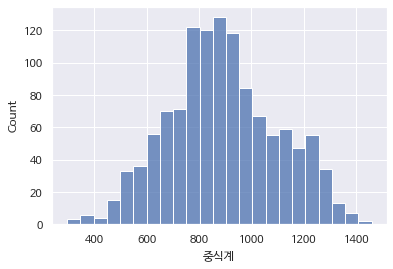

In [38]:
plt.rc('font', family='NanumBarunGothic') 
sns.histplot(train['중식계'])
plt.show()

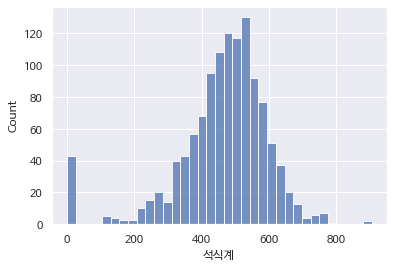

In [39]:
plt.rc('font', family='NanumBarunGothic') 
sns.histplot(train['석식계'])
plt.show()

# Feature engineering

In [27]:
train_test = my_concat(train, test)

In [28]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 49
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1255 non-null   datetime64[ns]
 1   요일              1255 non-null   object        
 2   본사정원수           1255 non-null   int64         
 3   본사휴가자수          1255 non-null   int64         
 4   본사출장자수          1255 non-null   int64         
 5   본사시간외근무명령서승인건수  1255 non-null   int64         
 6   현본사소속재택근무자수     1255 non-null   float64       
 7   조식메뉴            1255 non-null   object        
 8   중식메뉴            1255 non-null   object        
 9   석식메뉴            1255 non-null   object        
 10  중식계             1205 non-null   float64       
 11  석식계             1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 127.5+ KB


## date

In [29]:
train_test['연'] = train_test['일자'].dt.year
train_test['월'] = train_test['일자'].dt.month
train_test['일'] = train_test['일자'].dt.day

In [62]:
train_test['요일'] = train_test['요일'].astype('category').cat.codes

In [64]:
train, test = my_split(train_test)

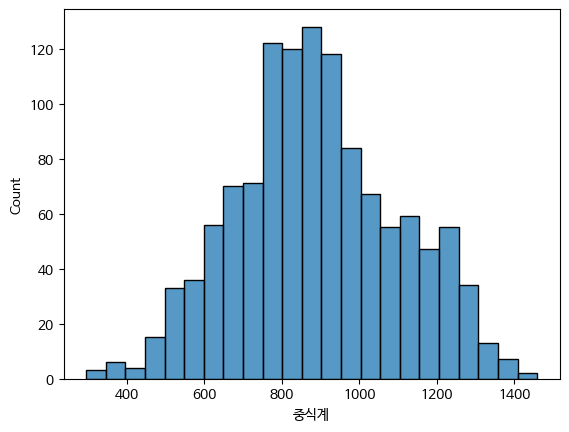

In [67]:
plt.rc('font', family='NanumBarunGothic') 
sns.histplot(train['중식계'])#, hue=train['요일'])
plt.show()

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False # - 기호 안 깨지게
plt.rcParams['font.size'] = 15

tpr = ProfileReport(train)

OSError: ignored

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False # - 기호 안 깨지게
plt.rcParams['font.size'] = 15

train_test.ProfileReport()

AttributeError: ignored

# Model selection - pycaret